### Note

### Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import uncertainties as unc

import sys
sys.path.append('../../Software/Python/Library')

import uplotlib as uplt

In [2]:
# reads the FileName and returns a label which identifies the dataset
# label = [filename, day, month, chip, aq_flux, ol_flux, analysis]
def fn_reader(filename):
    
    # return a list of floated values from the text string
    import re
    def get_numbers_from_filename(filename):
        z = re.findall(r'\d+(?:\.\d+)?', filename)
        return [float(z[s]) for s in range(len(z))]
    
    
    chip = 'None'
    if (filename.find('A') != -1): 
        chip = 'A'
    if (filename.find('B') != -1): 
        chip = 'B'
    analysis = 'None'
    if (filename.find('i') != -1): 
        analysis  = 'I'
    if (filename.find('e') != -1): 
        analysis  = 'E'
    date_d = get_numbers_from_filename(filename)[0]
    date_m = get_numbers_from_filename(filename)[1]
    ol     = get_numbers_from_filename(filename)[2]
    aq     = get_numbers_from_filename(filename)[3]
    label  = [filename, date_d, date_m, chip, ol, aq, analysis]
        
    return label

In [3]:
# returns the vector of the mean values of the property "target" indexed by the label
def df_reader(label, target):
    
    target = target.split('[')[0]
    
    values = []

    for i in np.arange(len(label)):        # runs through the files indexed by the label
        df = pd.read_csv(label[i][0])      # dataframe of the i° file
        #print(df)
        indexNamesArr  = df.index.values   # names of the rows of df
        
        for x in indexNamesArr:                                # runs through the rows of each dataframe
            if df.loc[x]['property'].split('[')[0] == target:  # finds the row of the property "target"
                values.append(df.loc[x][1:])                   # gets the values of the property
                print(label[i][0] + '\t' + target + '\t YES')
                check = 'true'
        
        # warning: the dataframe has not the "target" property 
        if check == 'false':
            print(label[i][0] + '\t' + target + '\t NO')
            values.append([np.nan, np.nan, np.nan, np.nan])
        
        check  = 'false'
                
    return values



In [4]:
# converts the array property([mean][mean std][sigma][sigma std]) in ufloat data_out([mean +- sigma])
def ufloat_converter(data_in): 
    
    data_out = []
    
    for idx in range(len(data_in)):
        data_out.append(unc.ufloat(data_in[idx][0], data_in[idx][2]))
    
    return data_out

In [5]:
# LaTex plot
FontSize = 18
plt.rc('axes',   titlesize = FontSize) # fontsize of the axes title
plt.rc('axes',   labelsize = FontSize) # fontsize of the x and y labels
plt.rc('xtick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('ytick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('legend', fontsize  = FontSize) # legend fontsize
plt.rc('figure', titlesize = FontSize) # fontsize of the figure title

matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size' :  18,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

### Importing data

In [6]:
# label = [filename, day, month, chip, aq_flux, ol_flux, analysis]
# label_E for electronic analysis
# label_I for image analysis

import glob, os
os.chdir("./")
label = [];
label_E_A = []
label_E_B = []
label_I_A = []
label_I_B = []
i = 0
for filename in glob.glob("*.csv"):
    label.append(fn_reader(filename))
    if label[i][6] == 'E':
        if label[i][3] == 'A':    
            label_E_A.append(fn_reader(filename))
        if label[i][3] == 'B':    
            label_E_B.append(fn_reader(filename))
    if label[i][6] == 'I':
        if label[i][3] == 'A':    
            label_I_A.append(fn_reader(filename))
        if label[i][3] == 'B':    
            label_I_B.append(fn_reader(filename))
    i = i+1

label_E_A = np.array(label_E_A)
label_E_B = np.array(label_E_B)
label_I_A = np.array(label_I_A)
label_I_B = np.array(label_I_B)

print ('Label_E_A:\n')
print(label_E_A)
print ('\n\n Label_E_B:\n')
print(label_E_B)
print ('\n\n Label_I_A:\n')
print(label_I_A)
print ('\n\n Label_I_B:\n')
print(label_I_B)

Label_E_A:

[['2-12_A-ol0.5-aq0.5_e.csv' '2.0' '12.0' 'A' '0.5' '0.5' 'E']]


 Label_E_B:

[['2-12_B-ol10-aq10_e.csv' '2.0' '12.0' 'B' '10.0' '10.0' 'E']
 ['2-12_B-ol15-aq5_e.csv' '2.0' '12.0' 'B' '15.0' '5.0' 'E']
 ['2-12_B-ol2-aq2_e.csv' '2.0' '12.0' 'B' '2.0' '2.0' 'E']
 ['2-12_B-ol3-aq7_e.csv' '2.0' '12.0' 'B' '3.0' '7.0' 'E']
 ['2-12_B-ol30-aq10_e.csv' '2.0' '12.0' 'B' '30.0' '10.0' 'E']
 ['2-12_B-ol5-aq15_e.csv' '2.0' '12.0' 'B' '5.0' '15.0' 'E']
 ['2-12_B-ol5-aq5_e.csv' '2.0' '12.0' 'B' '5.0' '5.0' 'E']
 ['2-12_B-ol7-aq3_e.csv' '2.0' '12.0' 'B' '7.0' '3.0' 'E']]


 Label_I_A:

[['2-12_A-ol0.5-aq0.5_i.csv' '2.0' '12.0' 'A' '0.5' '0.5' 'I']
 ['2-12_A-ol2-aq2_i.csv' '2.0' '12.0' 'A' '2.0' '2.0' 'I']
 ['2-12_A-ol5-aq5_i.csv' '2.0' '12.0' 'A' '5.0' '5.0' 'I']]


 Label_I_B:

[['2-12_B-ol10-aq10_i.csv' '2.0' '12.0' 'B' '10.0' '10.0' 'I']
 ['2-12_B-ol15-aq5_i.csv' '2.0' '12.0' 'B' '15.0' '5.0' 'I']
 ['2-12_B-ol2-aq2_i.csv' '2.0' '12.0' 'B' '2.0' '2.0' 'I']
 ['2-12_B-ol3-aq7_i.csv' '2.0

### Data arrangement

In [7]:
# Electronic dataframes -----------------------------------
# temporal distance
E_B_temp_dist_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'Temporal distance 1 [s]'))))
E_B_temp_dist_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'Temporal distance 2 [s]'))))
E_B_temp_dist_avg = (E_B_temp_dist_1 + E_B_temp_dist_2)/2
E_A_temp_dist_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'Temporal distance 1 [s]'))))
E_A_temp_dist_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'Temporal distance 2 [s]'))))
E_A_temp_dist_avg = (E_A_temp_dist_1 + E_A_temp_dist_2)/2
# temporal size
E_B_temp_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'temporal size 1 [s]'))))
E_B_temp_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'temporal size 2 [s]'))))
E_B_temp_size_avg = (E_B_temp_size_1 + E_B_temp_size_2)/2
E_A_temp_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'temporal size 1 [s]'))))
E_A_temp_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'temporal size 2 [s]'))))
E_A_temp_size_avg = (E_A_temp_size_1 + E_A_temp_size_2)/2
# temporal period
E_B_temp_peri_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'temporal period 1 [s]'))))
E_B_temp_peri_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'temporal period 2 [s]'))))
E_B_temp_peri_avg = (E_B_temp_peri_1 + E_B_temp_peri_2)/2
E_A_temp_peri_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'temporal period 1 [s]'))))
E_A_temp_peri_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'temporal period 2 [s]'))))
E_A_temp_peri_avg = (E_A_temp_peri_1 + E_A_temp_peri_2)/2
# dt d)etectors
E_B_dt_detectrs   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'dt detectors [s]'))))
E_A_dt_detectrs   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'dt detectors [s]'))))
# velocity
E_B_velocities    = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'velocity [s]'))))
E_A_velocities    = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'velocity [s]'))))
# spatial size
E_B_spat_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'spatial size 1 [s]'))))
E_B_spat_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'spatial size 2 [s]'))))
E_B_spat_size_avg = (E_B_spat_size_1 + E_B_spat_size_2)/2
E_A_spat_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'spatial size 1 [s]'))))
E_A_spat_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'spatial size 2 [s]'))))
E_A_spat_size_avg = (E_A_spat_size_1 + E_A_spat_size_2)/2
# spatial distance
E_B_spat_dist_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'spatial distance 1 [s]'))))
E_B_spat_dist_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'spatial distance 2 [s]'))))
E_B_spat_dist_avg = (E_B_spat_dist_1 + E_B_spat_dist_2)/2
E_A_spat_dist_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'spatial distance 1 [s]'))))
E_A_spat_dist_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'spatial distance 2 [s]'))))
E_A_spat_dist_avg = (E_A_spat_dist_1 + E_A_spat_dist_2)/2
# fiber spatial size
E_B_fibe_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'fiber spatial size 1 [s]'))))
E_B_fibe_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_B, 'fiber spatial size 2 [s]'))))
E_B_fibe_size_avg = (E_B_fibe_size_1 + E_B_fibe_size_2)/2
E_A_fibe_size_1   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'fiber spatial size 1 [s]'))))
E_A_fibe_size_2   = np.array(ufloat_converter(np.array(df_reader(label_E_A, 'fiber spatial size 2 [s]'))))
E_A_fibe_size_avg = (E_A_fibe_size_1 + E_A_fibe_size_2)/2

# Image dataframes -----------------------------------------
# distance
I_B_distance_w = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'distance w [mm]'))))
I_B_distance_n = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'distance n [mm]'))))
I_A_distance_w = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'distance w [mm]'))))
I_A_distance_n = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'distance n [mm]'))))
# wavelength
I_B_wavelength = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'wavelength [mm]'))))
I_A_wavelength = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'wavelength [mm]'))))
# size
I_B_size_w     = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'size w [mm]'))))
I_B_size_n     = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'size n [mm]'))))
I_A_size_w     = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'size w [mm]'))))
I_A_size_n     = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'size n [mm]'))))
# meniscus size
I_B_meniscus_b = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'meniscus size b [mm]'))))
I_B_meniscus_f = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'meniscus size f [mm]'))))
I_A_meniscus_b = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'meniscus size b [mm]'))))
I_A_meniscus_f = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'meniscus size f [mm]'))))
# velocity
I_B_velocity_w = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'velocity w [mm/s]'))))
I_B_velocity_n = np.array(ufloat_converter(np.array(df_reader(label_I_B, 'velocity n [mm/s]'))))
I_A_velocity_w = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'velocity w [mm/s]'))))
I_A_velocity_n = np.array(ufloat_converter(np.array(df_reader(label_I_A, 'velocity n [mm/s]'))))

# fluxes --------------------------------------------------
# electronic - chip B
Flux_aq_E_B  = np.array(label_E_B[:,5]).astype(float)
Flux_ol_E_B  = np.array(label_E_B[:,4]).astype(float)
Flux_tot_E_B = Flux_aq_E_B + Flux_ol_E_B
# electronic - chip A
Flux_aq_E_A  = np.array(label_E_A[:,5]).astype(float)
Flux_ol_E_A  = np.array(label_E_A[:,4]).astype(float)
Flux_tot_E_A = Flux_aq_E_A + Flux_ol_E_A
# image - chip B
Flux_aq_I_B  = np.array(label_I_B[:,5]).astype(float)
Flux_ol_I_B  = np.array(label_I_B[:,4]).astype(float)
Flux_tot_I_B = Flux_aq_I_B + Flux_ol_I_B
# image - chip A
Flux_aq_I_A  = np.array(label_I_A[:,5]).astype(float)
Flux_ol_I_A  = np.array(label_I_A[:,4]).astype(float)
Flux_tot_I_A = Flux_aq_I_A + Flux_ol_I_A


2-12_B-ol10-aq10_e.csv	Temporal distance 1 	 YES
2-12_B-ol15-aq5_e.csv	Temporal distance 1 	 YES
2-12_B-ol2-aq2_e.csv	Temporal distance 1 	 YES
2-12_B-ol3-aq7_e.csv	Temporal distance 1 	 YES
2-12_B-ol30-aq10_e.csv	Temporal distance 1 	 YES
2-12_B-ol5-aq15_e.csv	Temporal distance 1 	 YES
2-12_B-ol5-aq5_e.csv	Temporal distance 1 	 YES
2-12_B-ol7-aq3_e.csv	Temporal distance 1 	 YES
2-12_B-ol10-aq10_e.csv	Temporal distance 2 	 YES
2-12_B-ol15-aq5_e.csv	Temporal distance 2 	 YES
2-12_B-ol2-aq2_e.csv	Temporal distance 2 	 YES
2-12_B-ol3-aq7_e.csv	Temporal distance 2 	 YES
2-12_B-ol30-aq10_e.csv	Temporal distance 2 	 YES
2-12_B-ol5-aq15_e.csv	Temporal distance 2 	 YES
2-12_B-ol5-aq5_e.csv	Temporal distance 2 	 YES
2-12_B-ol7-aq3_e.csv	Temporal distance 2 	 YES
2-12_A-ol0.5-aq0.5_e.csv	Temporal distance 1 	 YES
2-12_A-ol0.5-aq0.5_e.csv	Temporal distance 2 	 YES
2-12_B-ol10-aq10_e.csv	temporal size 1 	 YES
2-12_B-ol15-aq5_e.csv	temporal size 1 	 YES
2-12_B-ol2-aq2_e.csv	temporal size 1 	 YES
2-

2-12_B-ol2-aq2_i.csv	velocity w 	 YES
2-12_B-ol3-aq7_i.csv	velocity w 	 YES
2-12_B-ol5-aq15_i.csv	velocity w 	 YES
2-12_B-ol5-aq5_i.csv	velocity w 	 YES
2-12_B-ol7-aq3_i.csv	velocity w 	 YES
2-12_B-ol10-aq10_i.csv	velocity n 	 YES
2-12_B-ol15-aq5_i.csv	velocity n 	 YES
2-12_B-ol2-aq2_i.csv	velocity n 	 YES
2-12_B-ol3-aq7_i.csv	velocity n 	 YES
2-12_B-ol5-aq15_i.csv	velocity n 	 YES
2-12_B-ol5-aq5_i.csv	velocity n 	 YES
2-12_B-ol7-aq3_i.csv	velocity n 	 YES
2-12_A-ol0.5-aq0.5_i.csv	velocity w 	 YES
2-12_A-ol2-aq2_i.csv	velocity w 	 YES
2-12_A-ol5-aq5_i.csv	velocity w 	 YES
2-12_A-ol0.5-aq0.5_i.csv	velocity n 	 YES
2-12_A-ol2-aq2_i.csv	velocity n 	 YES
2-12_A-ol5-aq5_i.csv	velocity n 	 YES


In [8]:
from importlib import reload
reload(uplt)

<module 'uplotlib' from '../../Software/Python/Library/uplotlib.py'>

In [9]:
from scipy.optimize import curve_fit

def lin_func(x, a, b):
    return a*x + b

def lin_func0(x, a):
    return x*a

### Wavelength (period) vs total flux

a = 0.028701917684162234+/-0.0030912704178243343, b = -0.013806301728423929+/-0.03414875279287812


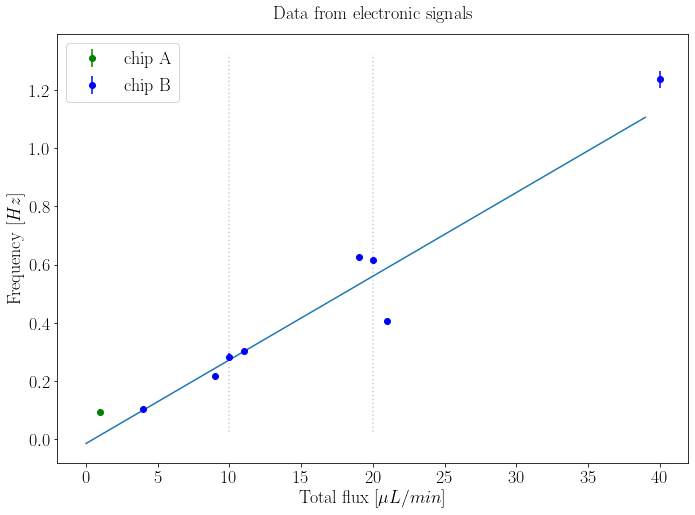

In [10]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Frequency $[Hz]$')

dm = uplt.DataMisaligner(x_misalignment=1)

dm.add(Flux_tot_E_A, 1./E_A_temp_peri_avg, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_E_B, 1./E_B_temp_peri_avg, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip B') 
dm.plot(ax)

# fit

popt, pcov = curve_fit(lin_func, Flux_tot_E_B, [y.n for y in 1./E_B_temp_peri_avg], sigma=[y.s for y in 1./E_B_temp_peri_avg])

a, b = unc.correlated_values(popt, pcov)
print(f'{a = }, {b = }')
x_fine = np.arange(0,40,1)
ax.plot(x_fine, lin_func(x_fine, *popt))

ax.legend(loc='best')
plt.title('Data from electronic signals', loc='center', pad=15)
fig.tight_layout()
plt.show()

Aggiungiamo dati per il chip A

I punti del chip A dovrebbero stare su una retta con pendenza maggiore

L'intercetta deve essere compatibile con 0

Se la lunghezza d'onda non dipende dal flusso totale, ci aspettiamo che la frequenza sia proprozionale al flusso totale

In [11]:
print('ol \t aq \t lambda')
for i in list(zip(Flux_ol_I_B, Flux_aq_I_B, I_B_wavelength)):
    print(i)

ol 	 aq 	 lambda
(10.0, 10.0, 7.873896044053461+/-0.11887324598111147)
(15.0, 5.0, 7.590035054087937+/-0.1448213507444267)
(2.0, 2.0, 8.55347694929047+/-0.142781578085525)
(3.0, 7.0, 10.627745894461984+/-0.33137367359591674)
(5.0, 15.0, 11.881443763494627+/-0.36905195767536697)
(5.0, 5.0, 8.147050991893325+/-0.109885405807175)
(7.0, 3.0, 7.926680254792128+/-0.09615934206998487)


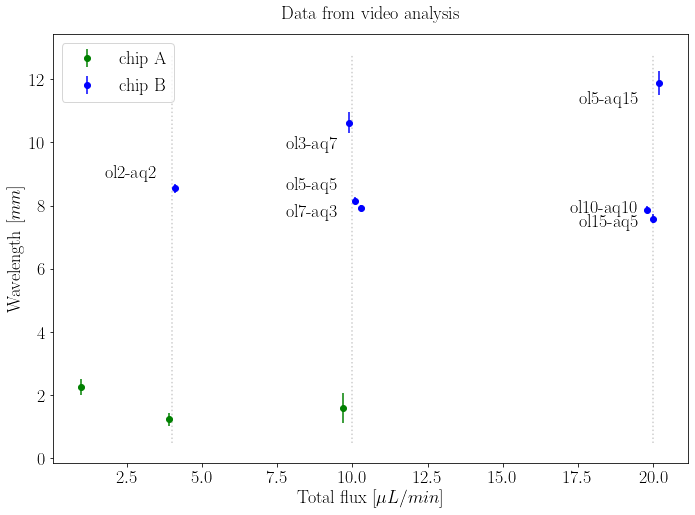

In [13]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Wavelength $[mm]$')

dm = uplt.DataMisaligner(x_misalignment=0.2)

dm.add(Flux_tot_I_A, I_A_wavelength, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_I_B, I_B_wavelength, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip B') 
dm.plot(ax)

a = 0.9
for i in range(len(I_B_wavelength)):
    ax.annotate(f'ol{Flux_ol_I_B[i] :.0f}-aq{Flux_aq_I_B[i] :.0f}',
                (Flux_tot_I_B[i] - 0.5, I_B_wavelength[i].n + np.random.uniform(-a,a)), horizontalalignment='right')

ax.legend(loc='best')
plt.title('Data from video analysis', loc='center', pad=15)
fig.tight_layout()
plt.show()

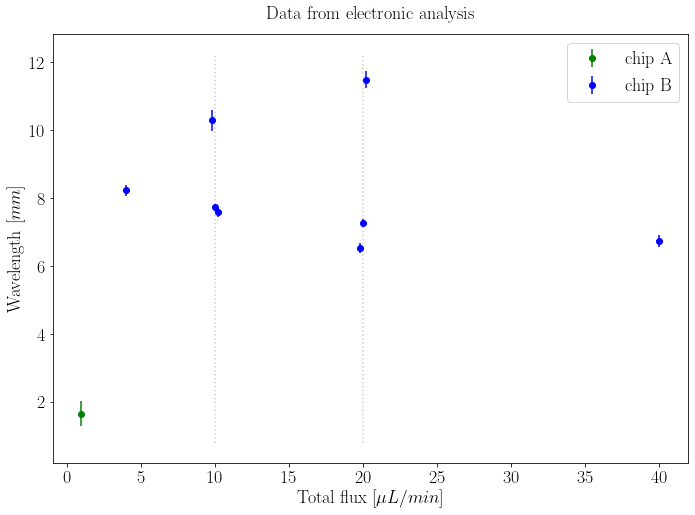

In [14]:
E_A_wavelength = E_A_spat_dist_avg + E_A_spat_size_avg
E_B_wavelength = E_B_spat_dist_avg + E_B_spat_size_avg

fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Wavelength $[mm]$')

dm = uplt.DataMisaligner(x_misalignment=0.2)

dm.add(Flux_tot_E_A, E_A_wavelength, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_E_B, E_B_wavelength, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip B') 
dm.plot(ax)

# a = 0.9
# for i in range(len(I_B_wavelength)):
#     ax.annotate(f'ol{Flux_ol_I_B[i] :.0f}-aq{Flux_aq_I_B[i] :.0f}',
#                 (Flux_tot_I_B[i] - 0.5, I_B_wavelength[i].n + np.random.uniform(-a,a)), horizontalalignment='right')

ax.legend(loc='best')
plt.title('Data from electronic analysis', loc='center', pad=15)
fig.tight_layout()
plt.show()

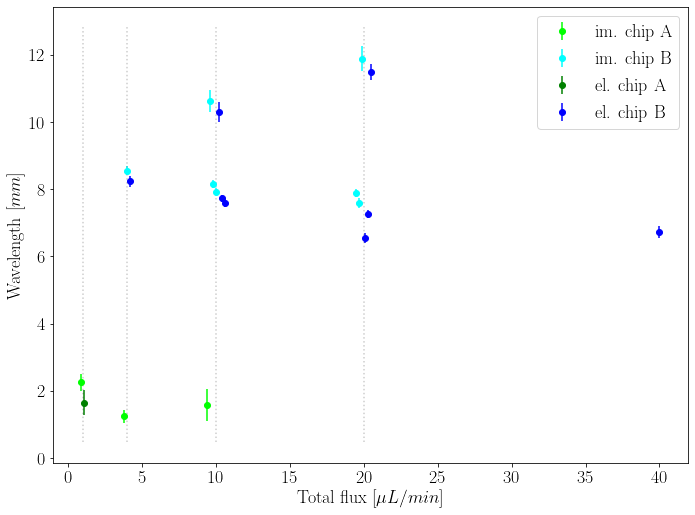

In [15]:
E_A_wavelength = E_A_spat_dist_avg + E_A_spat_size_avg
E_B_wavelength = E_B_spat_dist_avg + E_B_spat_size_avg

fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Wavelength $[mm]$')

dm = uplt.DataMisaligner(x_misalignment=0.2)

dm.add(Flux_tot_I_A, I_A_wavelength, ax = ax,  fmt='o', alpha = 1., color='lime', label = 'im. chip A')
dm.add(Flux_tot_I_B, I_B_wavelength, ax = ax,  fmt='o', alpha = 1., color='cyan', label = 'im. chip B') 
dm.add(Flux_tot_E_A, E_A_wavelength, ax = ax,  fmt='o', alpha = 1., color='green', label = 'el. chip A')
dm.add(Flux_tot_E_B, E_B_wavelength, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'el. chip B') 
dm.plot(ax)

# a = 0.9
# for i in range(len(I_B_wavelength)):
#     ax.annotate(f'ol{Flux_ol_I_B[i] :.0f}-aq{Flux_aq_I_B[i] :.0f}',
#                 (Flux_tot_I_B[i] - 0.5, I_B_wavelength[i].n + np.random.uniform(-a,a)), horizontalalignment='right')

ax.legend(loc='best')
# plt.title('Data from electronic analysis', loc='center', pad=15)
fig.tight_layout()
plt.show()

Nel chip A le gocce sono più corte e più vicine quindi lunghezza d'onda minore. Nel chip B ci sono due regimi?

Power point con etichette?

### ratio distance/size vs ratio aq flux/ oil flux

a = 0.8687712495019222+/-0.0001314809552482036


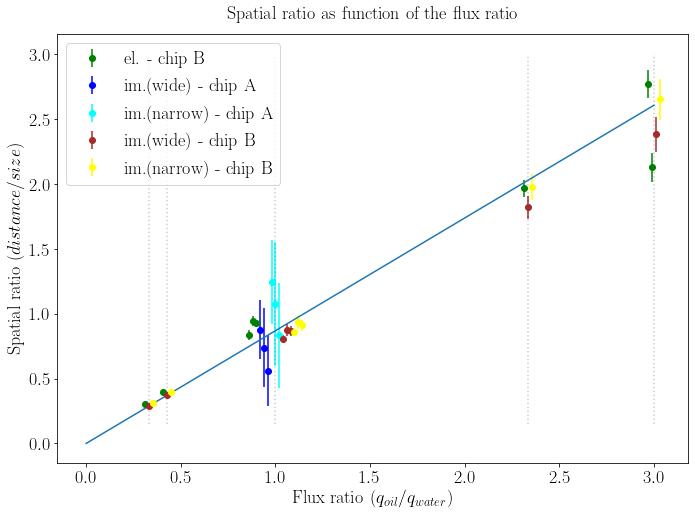

In [16]:
# flux ratio
Flux_ratio_I_A = 1/(Flux_aq_I_A/Flux_ol_I_A)           
Flux_ratio_I_B = 1/(Flux_aq_I_B/Flux_ol_I_B)
Flux_ratio_E_A = 1/(Flux_aq_E_A/Flux_ol_E_A)
Flux_ratio_E_B = 1/(Flux_aq_E_B/Flux_ol_E_B)
# size/distance ratio
E_A_sd_ratio   = E_A_spat_dist_avg/E_A_spat_size_avg  # electronic - chip A
E_B_sd_ratio   = E_B_spat_dist_avg/E_B_spat_size_avg  # electronic - chip B
I_A_w_sd_ratio = I_A_distance_w/I_A_size_w            # image (wide) - chip A
I_B_w_sd_ratio = I_B_distance_w/I_B_size_w            # image (wide) - chip B
I_A_n_sd_ratio = I_A_distance_n/I_A_size_n            # image (narrow) - chip A
I_B_n_sd_ratio = I_B_distance_n/I_B_size_n            # image (narrow) - chip B


fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax.set_xlabel('Flux ratio $(q_{oil}/q_{water})$')
ax.set_ylabel('Spatial ratio $(distance/size)$')

dm = uplt.DataMisaligner(x_misalignment=0.02)

#dm.add(Flux_ratio_E_A, E_A_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='green', label = 'el. - chip A')
dm.add(Flux_ratio_E_B, E_B_sd_ratio,   ax = ax,  fmt='o', alpha = 1., color='green',  label = 'el. - chip B') 
dm.add(Flux_ratio_I_A, I_A_w_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='blue',   label = 'im.(wide) - chip A') 
dm.add(Flux_ratio_I_A, I_A_n_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='cyan',   label = 'im.(narrow) - chip A')
dm.add(Flux_ratio_I_B, I_B_w_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='brown',  label = 'im.(wide) - chip B')  
dm.add(Flux_ratio_I_B, I_B_n_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'im.(narrow) - chip B') 
dm.plot(ax)

# fit
xdata = np.concatenate((Flux_ratio_E_B, Flux_ratio_I_A, Flux_ratio_I_A, Flux_ratio_I_B, Flux_ratio_I_B))
ydata = np.concatenate((E_B_sd_ratio, I_A_w_sd_ratio, I_A_n_sd_ratio, I_B_w_sd_ratio, I_B_n_sd_ratio))

# xdata = np.concatenate((Flux_ratio_I_A, Flux_ratio_I_B))
# ydata = np.concatenate((I_A_n_sd_ratio, I_B_n_sd_ratio))

# popt, pcov = curve_fit(lin_func, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

# a, b = unc.correlated_values(popt, pcov)
# print(f'{a = }, {b = }')
# x_fine = np.arange(0,4,1)
# ax.plot(x_fine, lin_func(x_fine, *popt))

popt, pcov = curve_fit(lin_func0, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

a = unc.ufloat(popt, pcov)
print(f'{a = }')
x_fine = np.arange(0,4,1)
ax.plot(x_fine, lin_func0(x_fine, *popt))


ax.legend(loc='best')
plt.title('Spatial ratio as function of the flux ratio', loc='center', pad=15)
fig.tight_layout()
plt.show()

UGLY!!

a = 0.9452731221605433+/-2.680297125288927e-05


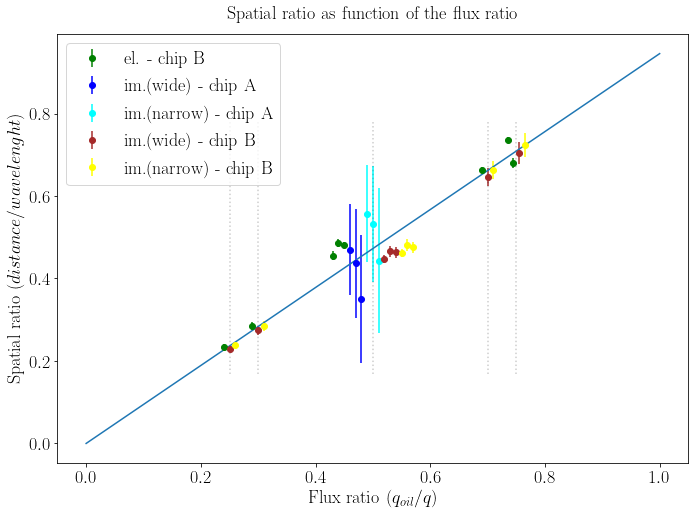

In [17]:
# flux ratio
Flux_ratio_I_A = Flux_ol_I_A/Flux_tot_I_A          
Flux_ratio_I_B = Flux_ol_I_B/Flux_tot_I_B
Flux_ratio_E_A = Flux_ol_E_A/Flux_tot_E_A
Flux_ratio_E_B = Flux_ol_E_B/Flux_tot_E_B
# size/distance ratio
E_A_sd_ratio   = E_A_spat_dist_avg/E_A_wavelength  # electronic - chip A
E_B_sd_ratio   = E_B_spat_dist_avg/E_B_wavelength  # electronic - chip B
I_A_w_sd_ratio = I_A_distance_w/I_A_wavelength           # image (wide) - chip A
I_B_w_sd_ratio = I_B_distance_w/I_B_wavelength            # image (wide) - chip B
I_A_n_sd_ratio = I_A_distance_n/I_A_wavelength           # image (narrow) - chip A
I_B_n_sd_ratio = I_B_distance_n/I_B_wavelength         # image (narrow) - chip B


fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax.set_xlabel('Flux ratio $(q_{oil}/q)$')
ax.set_ylabel('Spatial ratio $(distance/wavelenght)$')

dm = uplt.DataMisaligner(x_misalignment=0.01)

#dm.add(Flux_ratio_E_A, E_A_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='green', label = 'el. - chip A')
dm.add(Flux_ratio_E_B, E_B_sd_ratio,   ax = ax,  fmt='o', alpha = 1., color='green',  label = 'el. - chip B') 
dm.add(Flux_ratio_I_A, I_A_w_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='blue',   label = 'im.(wide) - chip A') 
dm.add(Flux_ratio_I_A, I_A_n_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='cyan',   label = 'im.(narrow) - chip A')
dm.add(Flux_ratio_I_B, I_B_w_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='brown',  label = 'im.(wide) - chip B')  
dm.add(Flux_ratio_I_B, I_B_n_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'im.(narrow) - chip B') 
dm.plot(ax)

# fit
xdata = np.concatenate((Flux_ratio_E_B, Flux_ratio_I_A, Flux_ratio_I_A, Flux_ratio_I_B, Flux_ratio_I_B))
ydata = np.concatenate((E_B_sd_ratio, I_A_w_sd_ratio, I_A_n_sd_ratio, I_B_w_sd_ratio, I_B_n_sd_ratio))

# xdata = np.concatenate((Flux_ratio_I_A, Flux_ratio_I_B))
# ydata = np.concatenate((I_A_n_sd_ratio, I_B_n_sd_ratio))

# popt, pcov = curve_fit(lin_func, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

# a, b = unc.correlated_values(popt, pcov)
# print(f'{a = }, {b = }')
# x_fine = np.arange(0,1.1,1)
# ax.plot(x_fine, lin_func(x_fine, *popt))

popt, pcov = curve_fit(lin_func0, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

a = unc.ufloat(popt, pcov)
print(f'{a = }')
x_fine = np.arange(0,1.1,1)
ax.plot(x_fine, lin_func0(x_fine, *popt))

ax.legend(loc='best')
plt.title('Spatial ratio as function of the flux ratio', loc='center', pad=15)
fig.tight_layout()
plt.show()

a = 1.0492045363738491+/-7.750263969809653e-05


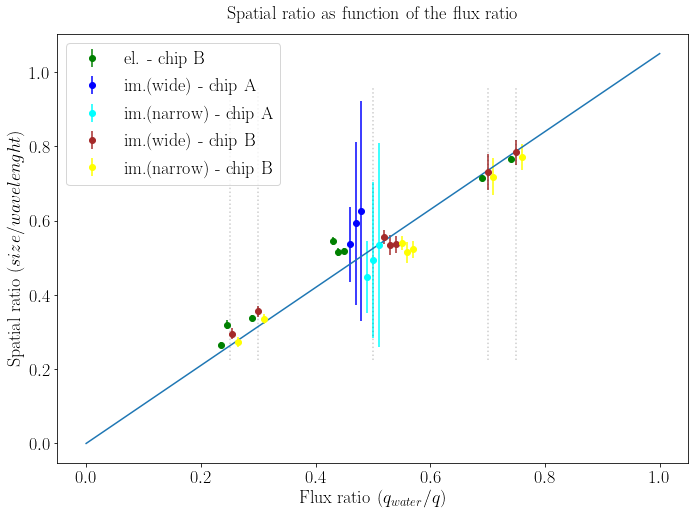

In [18]:
# flux ratio
Flux_ratio_I_A = Flux_aq_I_A/Flux_tot_I_A          
Flux_ratio_I_B = Flux_aq_I_B/Flux_tot_I_B
Flux_ratio_E_A = Flux_aq_E_A/Flux_tot_E_A
Flux_ratio_E_B = Flux_aq_E_B/Flux_tot_E_B
# size/distance ratio
E_A_sd_ratio   = E_A_spat_size_avg/E_A_wavelength  # electronic - chip A
E_B_sd_ratio   = E_B_spat_size_avg/E_B_wavelength  # electronic - chip B
I_A_w_sd_ratio = I_A_size_w/I_A_wavelength           # image (wide) - chip A
I_B_w_sd_ratio = I_B_size_w/I_B_wavelength            # image (wide) - chip B
I_A_n_sd_ratio = I_A_size_n/I_A_wavelength           # image (narrow) - chip A
I_B_n_sd_ratio = I_B_size_n/I_B_wavelength         # image (narrow) - chip B


fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax.set_xlabel('Flux ratio $(q_{water}/q)$')
ax.set_ylabel('Spatial ratio $(size/wavelenght)$')

dm = uplt.DataMisaligner(x_misalignment=0.01)

#dm.add(Flux_ratio_E_A, E_A_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='green', label = 'el. - chip A')
dm.add(Flux_ratio_E_B, E_B_sd_ratio,   ax = ax,  fmt='o', alpha = 1., color='green',  label = 'el. - chip B') 
dm.add(Flux_ratio_I_A, I_A_w_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='blue',   label = 'im.(wide) - chip A') 
dm.add(Flux_ratio_I_A, I_A_n_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='cyan',   label = 'im.(narrow) - chip A')
dm.add(Flux_ratio_I_B, I_B_w_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='brown',  label = 'im.(wide) - chip B')  
dm.add(Flux_ratio_I_B, I_B_n_sd_ratio, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'im.(narrow) - chip B') 
dm.plot(ax)

# fit
xdata = np.concatenate((Flux_ratio_E_B, Flux_ratio_I_A, Flux_ratio_I_A, Flux_ratio_I_B, Flux_ratio_I_B))
ydata = np.concatenate((E_B_sd_ratio, I_A_w_sd_ratio, I_A_n_sd_ratio, I_B_w_sd_ratio, I_B_n_sd_ratio))

# xdata = np.concatenate((Flux_ratio_I_A, Flux_ratio_I_B))
# ydata = np.concatenate((I_A_n_sd_ratio, I_B_n_sd_ratio))

# popt, pcov = curve_fit(lin_func, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

# a, b = unc.correlated_values(popt, pcov)
# print(f'{a = }, {b = }')
# x_fine = np.arange(0,1.1,1)
# ax.plot(x_fine, lin_func(x_fine, *popt))

popt, pcov = curve_fit(lin_func0, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

a = unc.ufloat(popt, pcov)
print(f'{a = }')
x_fine = np.arange(0,1.1,1)
ax.plot(x_fine, lin_func0(x_fine, *popt))

ax.legend(loc='best')
plt.title('Spatial ratio as function of the flux ratio', loc='center', pad=15)
fig.tight_layout()
plt.show()

Si vede che la nostra analisi dati sovrastima la taglia delle gocce a discapito della distanza

### fiber spatial size

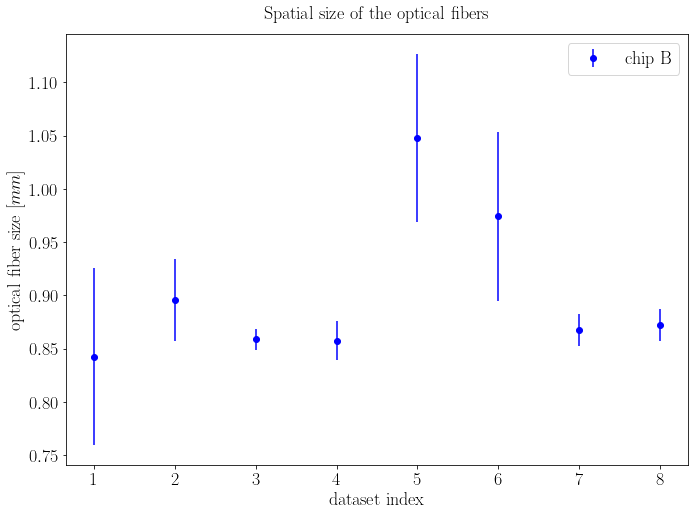

In [19]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('dataset index')
ax.set_ylabel('optical fiber size $[mm]$')

data_idx_B = np.arange(1, len(E_B_fibe_size_avg)+1, 1)

# uplt.plot(Flux_tot_E_A, E_A_fibe_size_avg, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
uplt.plot(data_idx_B, E_B_fibe_size_avg, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip B') 

ax.legend(loc='best')
plt.title('Spatial size of the optical fibers', loc='center', pad=15)
fig.tight_layout()
plt.show()

Valori sopra 1 mm si spiegano con la deformazione delle fibre a causa dello schiacciamento nel giunto

Valori più bassi si spigano con un disallineamento orizzontale delle fibre

### velocity 

a = 0.2220056647463197+/-9.644599727135694e-06


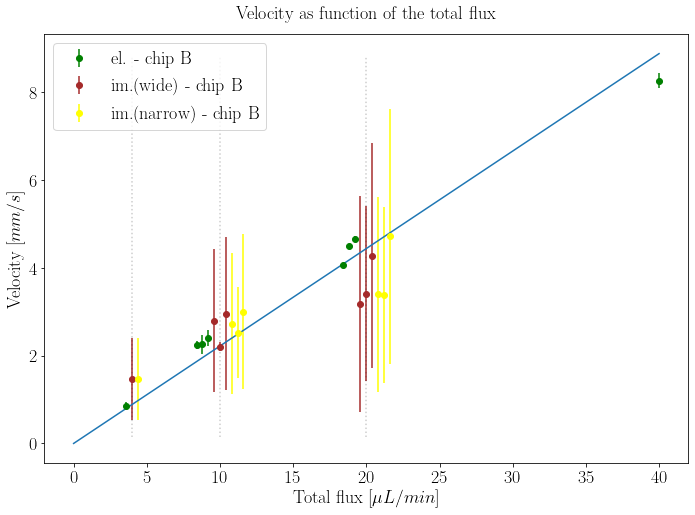

In [20]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Velocity $[mm/s]$')

dm = uplt.DataMisaligner(x_misalignment=0.4)

#dm.add(Flux_tot_E_A, E_A_velocities, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_E_B, E_B_velocities, ax = ax,  fmt='o', alpha = 1., color='green', label = 'el. - chip B')
dm.add(Flux_tot_I_B, I_B_velocity_w, ax = ax,  fmt='o', alpha = 1., color='brown', label = 'im.(wide) - chip B')
dm.add(Flux_tot_I_B, I_B_velocity_n, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'im.(narrow) - chip B')
dm.plot(ax)

# fit
xdata = np.concatenate((Flux_tot_E_B, Flux_tot_I_B,Flux_tot_I_B)[:1])
ydata = np.concatenate((E_B_velocities, I_B_velocity_w, I_B_velocity_n)[:1])

# xdata = np.concatenate((Flux_ratio_I_A, Flux_ratio_I_B))
# ydata = np.concatenate((I_A_n_sd_ratio, I_B_n_sd_ratio))

# popt, pcov = curve_fit(lin_func, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

# a, b = unc.correlated_values(popt, pcov)
# print(f'{a = }, {b = }')
# x_fine = np.arange(0,41.1,1)
# ax.plot(x_fine, lin_func(x_fine, *popt))

popt, pcov = curve_fit(lin_func0, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

a = unc.ufloat(popt, pcov)
print(f'{a = }')
x_fine = np.arange(0,41,1)
ax.plot(x_fine, lin_func0(x_fine, *popt))


ax.legend(loc='best')
plt.title('Velocity as function of the total flux', loc='center', pad=15)
fig.tight_layout()
plt.show()

#### Velocities computed as wavelenght/period

a = 0.2203977325242684+/-1.376878085331395e-05


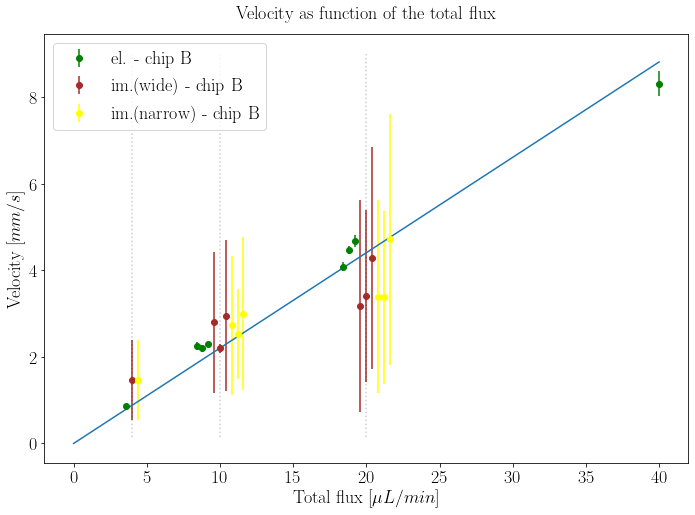

In [26]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('Velocity $[mm/s]$')

E_B_velocities_r = E_B_wavelength/E_B_temp_peri_avg

dm = uplt.DataMisaligner(x_misalignment=0.4)

#dm.add(Flux_tot_E_A, E_A_velocities, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_E_B, E_B_velocities_r, ax = ax,  fmt='o', alpha = 1., color='green', label = 'el. - chip B')
dm.add(Flux_tot_I_B, I_B_velocity_w, ax = ax,  fmt='o', alpha = 1., color='brown', label = 'im.(wide) - chip B')
dm.add(Flux_tot_I_B, I_B_velocity_n, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'im.(narrow) - chip B')
dm.plot(ax)

# fit
xdata = np.concatenate((Flux_tot_E_B, Flux_tot_I_B,Flux_tot_I_B)[:1])
ydata = np.concatenate((E_B_velocities_r, I_B_velocity_w, I_B_velocity_n)[:1])

# xdata = np.concatenate((Flux_ratio_I_A, Flux_ratio_I_B))
# ydata = np.concatenate((I_A_n_sd_ratio, I_B_n_sd_ratio))

# popt, pcov = curve_fit(lin_func, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

# a, b = unc.correlated_values(popt, pcov)
# print(f'{a = }, {b = }')
# x_fine = np.arange(0,41.1,1)
# ax.plot(x_fine, lin_func(x_fine, *popt))

popt, pcov = curve_fit(lin_func0, xdata, [y.n for y in ydata], sigma=[y.s for y in ydata])

a = unc.ufloat(popt, pcov)
print(f'{a = }')
x_fine = np.arange(0,41,1)
ax.plot(x_fine, lin_func0(x_fine, *popt))


ax.legend(loc='best')
plt.title('Velocity as function of the total flux', loc='center', pad=15)
fig.tight_layout()
plt.show()

Ci aspettavamo a = 0.236

### meniscus size

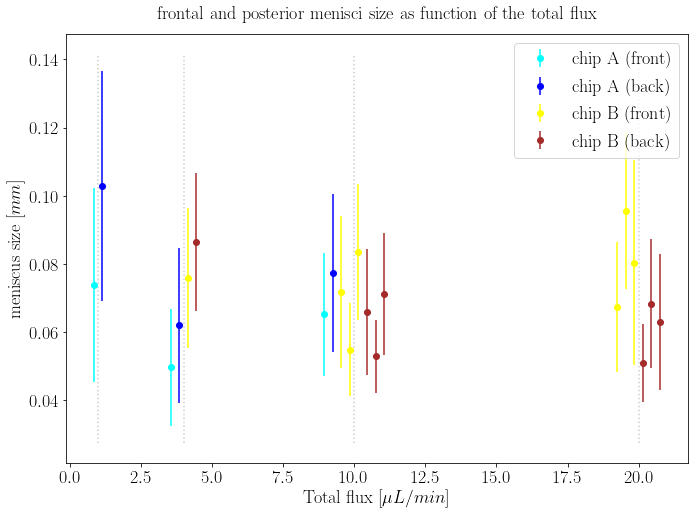

In [25]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('meniscus size $[mm]$')

dm = uplt.DataMisaligner(x_misalignment=0.3)

#dm.add(Flux_tot_E_A, E_A_fibe_size_avg, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_I_A, I_A_meniscus_f, ax = ax,  fmt='o', alpha = 1., color='cyan', label = 'chip A (front)') 
dm.add(Flux_tot_I_A, I_A_meniscus_b, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip A (back)')
dm.add(Flux_tot_I_B, I_B_meniscus_f, ax = ax,  fmt='o', alpha = 1., color='yellow', label = 'chip B (front)') 
dm.add(Flux_tot_I_B, I_B_meniscus_b, ax = ax,  fmt='o', alpha = 1., color='brown', label = 'chip B (back)')
dm.plot(ax)

ax.legend(loc='best')
plt.title('Data from video analysis', loc='center', pad=15)
fig.tight_layout()
plt.show()

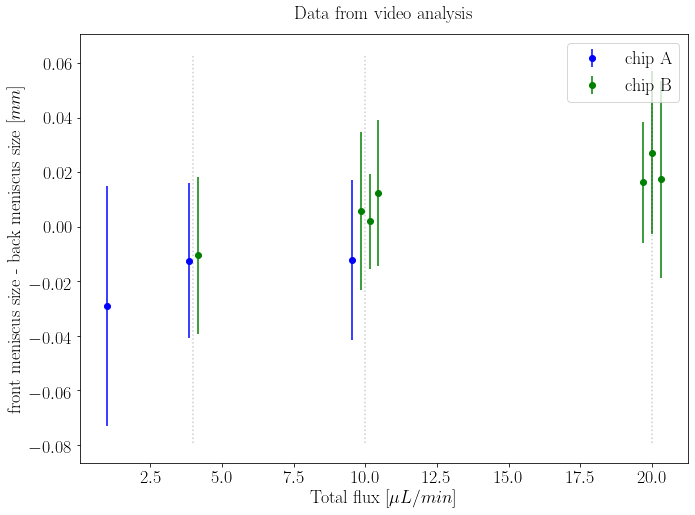

In [23]:
fig = plt.figure(figsize=(10,7.5))

ax = fig.add_subplot()
ax.set_xlabel('Total flux $[\mu L/min]$')
ax.set_ylabel('front meniscus size - back meniscus size $[mm]$')

dm = uplt.DataMisaligner(x_misalignment=0.3)

#dm.add(Flux_tot_E_A, E_A_fibe_size_avg, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip A')
dm.add(Flux_tot_I_A, I_A_meniscus_f - I_A_meniscus_b, ax = ax,  fmt='o', alpha = 1., color='blue', label = 'chip A') 
dm.add(Flux_tot_I_B, I_B_meniscus_f - I_B_meniscus_b, ax = ax,  fmt='o', alpha = 1., color='green', label = 'chip B') 
dm.plot(ax)

ax.legend(loc='best')
plt.title('Data from video analysis', loc='center', pad=15)
fig.tight_layout()
plt.show()

Quando il flusso è più veloce la goccia fa più attrito contro le pareti del capillare, quindi il menisco anteriore si allunga e quello posteriore si schiaccia